In [1]:
from GPyOpt.methods import BayesianOptimization
import numpy as np
from numpy.random import randn
import time
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
np.random.seed(24)

In [3]:
def one_dim(x):
    #1-D
    #optimum at x=0.96609, f(x)=-1.48907
    return -(1.4-3*x)*np.sin(18*x)+randn()*sigma
bounds_one_dim = [{'name':'x', 'type':'continuous', 'domain':(0, 1.2)}]

In [4]:
def booth(X):
    #2-D
    #optimum at X=[1,3] f(X)=0
    X = np.atleast_2d(X)
    x = X[:, 0]
    y = X[:, 1]
    return((x+2*y-7)**2+(2*x+y-5)**2)+randn()*sigma
bounds_booth = [{'name': 'x', 'type': 'continuous', 'domain': (-10,10)}]

In [5]:
def sphere(X):
    #n-D
    #optimum at X = [0,...,0], f(X)=0
    X = np.atleast_2d(X)
    return(np.sum(np.power(X,2), 1))+randn()*sigma
bounds_sphere = [{'name': 'x', 'type': 'continuous', 'domain': (-1,1)}]

In [6]:
def rastrigin(X):
    #n-D
    #optimum at X=[0,...,0], f(X)=0
    X = np.atleast_2d(X)
    return(10*len(X[0])+np.sum(np.power(X,2)-10*np.cos(2*np.pi*X),1))+randn()*sigma
bounds_rastrigin = [{'name': 'x', 'type': 'continuous', 'domain': (-5.12,5.12)}]

Hyperparameter testing done in gpyopt_test.py

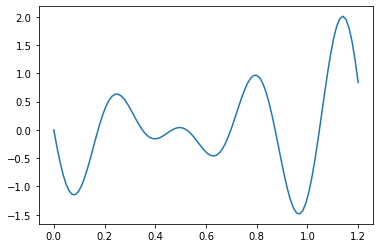

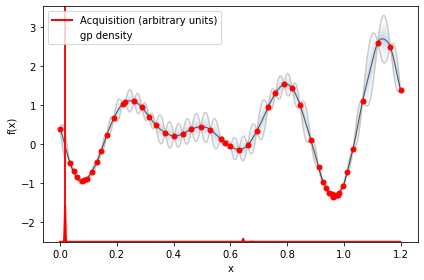

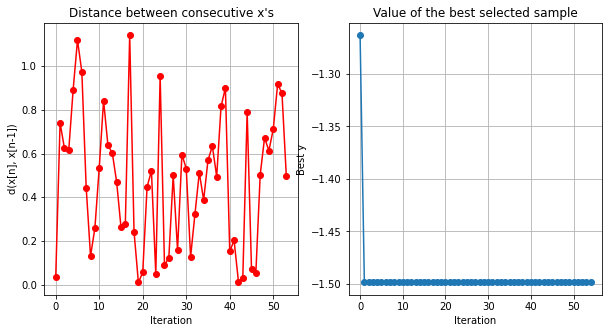

[0.96321203] -1.4987567870270293


In [17]:
# demonstrate with 1D - acquisition, noise effect, convergence
sigma=0
xdata = np.linspace(0, 1.2, 100)
ydata = [one_dim(x) for x in xdata]
plt.plot(xdata, ydata)
plt.show()
sigma = 0.01
myOpt = BayesianOptimization(one_dim, domain=bounds_one_dim, exact_feval=True, model="GP")
myOpt.run_optimization(max_iter=50, eps=1e-6)
myOpt.plot_acquisition()
myOpt.plot_convergence()
print(myOpt.x_opt, myOpt.fx_opt)

In [21]:
# show convergence for high dimension optimisation
sigma = 0
n=12
myOpt = BayesianOptimization(rastrigin, domain=bounds_rastrigin*n, exact_feval=True)
myOpt.run_optimization(max_iter=500, eps=1e-6)
myOpt.plot_convergence()
print(myOpt.x_opt, myOpt.fx_opt)

KeyboardInterrupt caught, calling on_optimization_end() to round things up


KeyboardInterrupt: 

In [19]:
# get optimisation timing as number of iterations increases
results = pd.DataFrame(None)

n = 10
sigma = 0
max_time = 600
actual_x = [[0]*n]
actual_f = 0
acq_type = "LCB"

for seed in [1,2,3,4,5]:
    np.random.seed(seed)
    for function in [sphere, rastrigin]:
        if function == sphere:
            domain = bounds_sphere*n
            func_name = "sphere"
        else:
            domain = bounds_rastrigin*n
            func_name = "rastrigin"
        
        for max_iter in [50, 70, 90, 110, 130, 150]:
            myOpt = BayesianOptimization(function,
                                        domain=domain,
                                        acquisition_type=acq_type,
                                        exact_feval=True)
            myOpt.run_optimization(max_iter = max_iter, max_time = max_time, eps=1e-6)
            
            result = {"n": n,"function":func_name, "sigma": sigma, "max_it": max_iter, "max_time": max_time, "acquisition func": acq_type, 
                    "eucl_dist to true x_opt": float(np.linalg.norm(myOpt.x_opt-actual_x)), 
                    "diff to true f(x_opt)": float(np.abs(function(myOpt.x_opt)-actual_f)), "actual_it": myOpt.num_acquisitions,
                    "actual_time": myOpt.cum_time}
    
            results = results.append(result, ignore_index=True)
            print(myOpt.x_opt, result)


[-0.39533485 -0.20646505  0.75623487 -0.71922612  0.38464523 -0.66033916
  0.06633057 -0.96342345  0.57855866 -0.42444932] {'n': 10, 'function': 'sphere', 'sigma': 0, 'max_it': 20, 'max_time': 600, 'acquisition func': 'LCB', 'eucl_dist to true x_opt': 1.8219677415920152, 'diff to true f(x_opt)': 3.3195664514019088, 'actual_it': 1, 'actual_time': 0.30343174934387207}
[-0.21636743  0.52176535  0.5933427   0.72808043  0.61596974  0.05106556
  0.37123325 -0.17435624  0.39556215 -0.4356465 ] {'n': 10, 'function': 'sphere', 'sigma': 0, 'max_it': 20, 'max_time': 600, 'acquisition func': 'LCB', 'eucl_dist to true x_opt': 1.4483468296979705, 'diff to true f(x_opt)': 2.0977085390961614, 'actual_it': 1, 'actual_time': 0.18376684188842773}
[-0.03404321 -0.22855892 -0.44983443  0.49531554 -0.9162588  -0.18452467
  0.12576366 -0.29108286 -0.51999216  0.92460673] {'n': 10, 'function': 'sphere', 'sigma': 0, 'max_it': 20, 'max_time': 600, 'acquisition func': 'LCB', 'eucl_dist to true x_opt': 1.61260700

[ 0.4355387  -0.39707758  0.4077747  -0.2519928   0.21561668  0.24720973
  0.05394265 -0.13876579 -0.15831921 -0.15539007] {'n': 10, 'function': 'sphere', 'sigma': 0, 'max_it': 20, 'max_time': 600, 'acquisition func': 'LCB', 'eucl_dist to true x_opt': 0.8695545689367454, 'diff to true f(x_opt)': 0.7561251483587692, 'actual_it': 1, 'actual_time': 0.20106124877929688}
[ 0.60219773  0.04495929 -0.27859243  0.31975964 -0.28454195  0.13291763
 -0.27949485 -0.89583901  0.66199334  0.43177131] {'n': 10, 'function': 'sphere', 'sigma': 0, 'max_it': 20, 'max_time': 600, 'acquisition func': 'LCB', 'eucl_dist to true x_opt': 1.4657630027261546, 'diff to true f(x_opt)': 2.148461180160793, 'actual_it': 1, 'actual_time': 0.24184179306030273}
[-0.05479885  0.58138212  0.07330591  0.74382954 -0.65432464  0.15525554
  0.31568415 -0.59600615 -0.25847182  0.86608839] {'n': 10, 'function': 'sphere', 'sigma': 0, 'max_it': 20, 'max_time': 600, 'acquisition func': 'LCB', 'eucl_dist to true x_opt': 1.619785739

[-0.58656169  0.03683598 -0.11738155 -0.40784013 -0.43062824  0.92786106
  0.39968723  0.03094522  0.74096617 -0.20211039] {'n': 10, 'function': 'sphere', 'sigma': 0, 'max_it': 20, 'max_time': 600, 'acquisition func': 'LCB', 'eucl_dist to true x_opt': 1.5239676181707595, 'diff to true f(x_opt)': 2.322477301233058, 'actual_it': 1, 'actual_time': 0.23677301406860352}
[-0.03269057 -0.07159623  0.59470063  0.72499915  0.07338319 -0.79918697
  0.5723124   0.21282041 -0.4739717   0.50300565] {'n': 10, 'function': 'sphere', 'sigma': 0, 'max_it': 20, 'max_time': 600, 'acquisition func': 'LCB', 'eucl_dist to true x_opt': 1.5427475733091254, 'diff to true f(x_opt)': 2.380070074951195, 'actual_it': 1, 'actual_time': 0.3742079734802246}
[ 0.36566735  0.82229684  0.43908141 -0.11549337  0.13945659  0.20874994
  0.366576   -0.52891021  0.02158115 -0.07622584] {'n': 10, 'function': 'sphere', 'sigma': 0, 'max_it': 20, 'max_time': 600, 'acquisition func': 'LCB', 'eucl_dist to true x_opt': 1.22451650836

In [20]:
results.to_excel("gpyopt_temp_results.xlsx", index=False)

Sparse GP tested in gpyopt_test.py

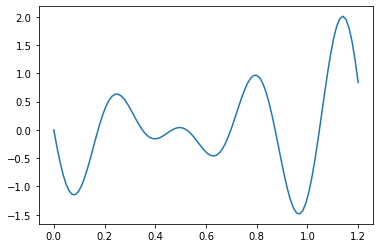

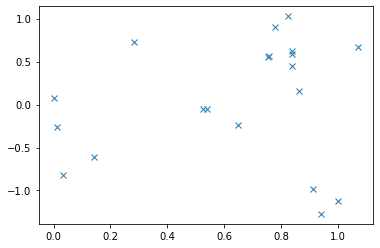

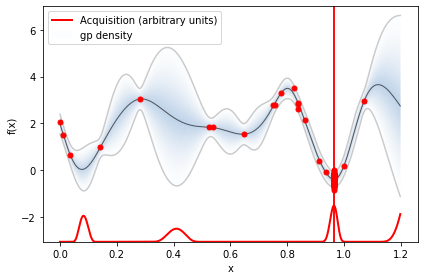

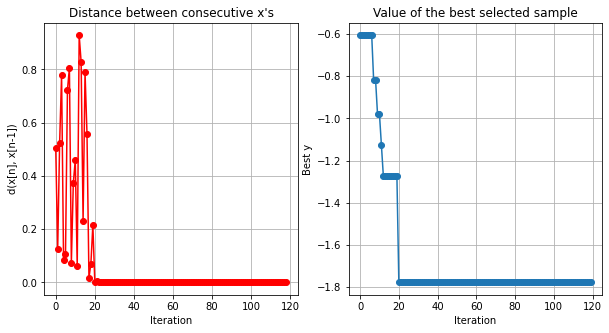

34.479954957962036


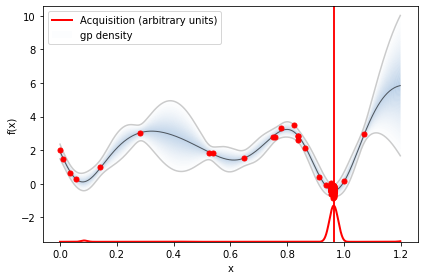

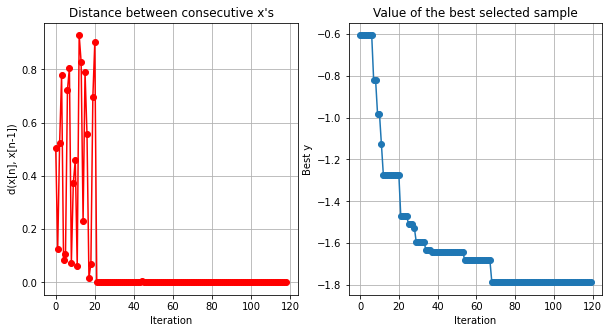

143.54919505119324


In [14]:
# difference between using GP and sparseGP
sigma=0
xdata = np.linspace(0, 1.2, 100)
ydata = [one_dim(x) for x in xdata]
plt.plot(xdata, ydata)
plt.show()

sigma=0.1
x_samples = np.random.rand(20,1)*1.2
y_samples = np.array([one_dim(x) for x in x_samples])
plt.plot(x_samples, y_samples, "x")
plt.show()

myOpt = BayesianOptimization(one_dim, X=x_samples, Y=y_samples, domain=bounds_one_dim, model_type="GP")
myOpt.run_optimization(max_iter = 100)
myOpt.plot_acquisition()
myOpt.plot_convergence()
print(myOpt.cum_time)

myOpt = BayesianOptimization(one_dim, X=x_samples, Y=y_samples, domain=bounds_one_dim, model_type="sparseGP", num_inducing=10)
myOpt.run_optimization(max_iter = 100)
myOpt.plot_acquisition()
myOpt.plot_convergence()
print(myOpt.cum_time)


In [7]:
sigma = 0.1
x_samples = np.random.rand(1000,2)*20-10
y_samples = np.array([booth(X) for X in x_samples])

myOpt = BayesianOptimization(booth, domain=bounds_booth*2, X=x_samples, Y=y_samples, exact_feval=True, model_type="sparseGP")
tic = time.perf_counter()
myOpt.run_optimization()
toc = time.perf_counter()
print(toc-tic)
print(myOpt.x_opt)

myOpt = BayesianOptimization(booth, domain=bounds_booth*2, X=x_samples, Y=y_samples, exact_feval=True, model_type="GP")
tic = time.perf_counter()
myOpt.run_optimization()
toc = time.perf_counter()
print(toc-tic)
print(myOpt.x_opt)

18.918324126003426
[0.907449   3.10584388]
31.819842196004174
[0.907449   3.10584388]


In [ ]:
sigma = 0.1
x_samples = np.random.rand(5000,2)*20-10
y_samples = np.array([booth(X) for X in x_samples])

myOpt = BayesianOptimization(booth, domain=bounds_booth*2, X=x_samples, Y=y_samples, exact_feval=True, model_type="sparseGP")
tic = time.perf_counter()
myOpt.run_optimization()
toc = time.perf_counter()
print(toc-tic)
print(myOpt.x_opt)

myOpt = BayesianOptimization(booth, domain=bounds_booth*2, X=x_samples, Y=y_samples, exact_feval=True, model_type="GP")
tic = time.perf_counter()
myOpt.run_optimization()
toc = time.perf_counter()
print(toc-tic)
print(myOpt.x_opt)

654.762863816999
[1.31330959 2.72238468]
